#<strong><center>Allripe</center></strong> 
#<strong><center>Kaggle Drone Dataset</center></strong>
#<strong><center>Data Analysis</center></strong>

### **Importing essential libraries**

In [ ]:
import os
import cv2
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import time
from datetime import date
from datetime import datetime
plt.style.use('seaborn')
%matplotlib inline



from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


#### **Plotting an image from dataset**

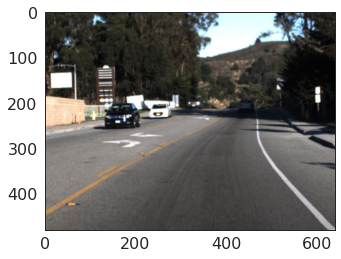

In [ ]:
img=image.load_img("/content/drive/My Drive/Allripe/drone dataset 1/center/1479425445433499090.jpg")
plt.imshow(img)

reading the size of an images

In [ ]:
cv2.imread("/content/drive/My Drive/Allripe/drone dataset 1/center/1479425441182877835.jpg").shape

(480, 640, 3)

reading the .csv file containing `frame_id` & `steering_angle` information.

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Allripe/drone dataset 1/final_example.csv')
df1.head(5)

,frame_id,steering_angle
0,1479425441182877835,-0.374
1,1479425441232704425,-0.065
2,1479425441282730750,-0.161
3,1479425441332806714,0.318
4,1479425441382790272,0.196


checking for null values in `df1` dataset. 

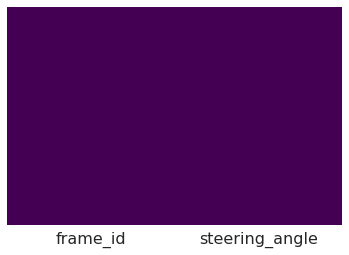

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

Hence, there are no null values

# **Correlation**
The plots under correlation is used to visualize the relationship between 2 or more variables. That is, how does one variable change with respect to another.

#### 1) Correllogram
Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

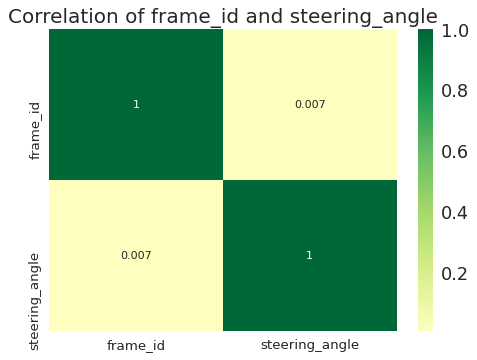

In [ ]:
# Plot
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(df1.corr(), xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation of frame_id and steering_angle', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

So, the correlation between `frame_id` & `steering_angle` is 0.007 which means there is alomost no correlation. 

#### 2) Pairwise Plot
Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

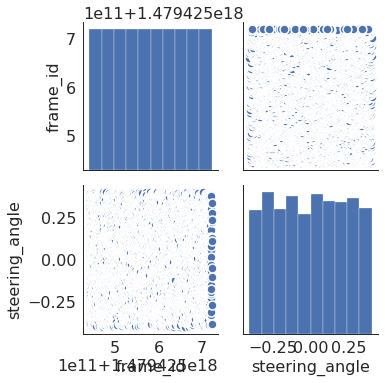

In [ ]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=1.5))
plt.show()

So, `frame_id` has a constant distribution, however `steering_angle` showed some fluctuations.

#### 3) Scatter plot with linear regression line of best fit
If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. The below plot shows how the line of best fit differs amongst various groups in the data. To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the hue='cyl' parameter from the sns.lmplot() call below.

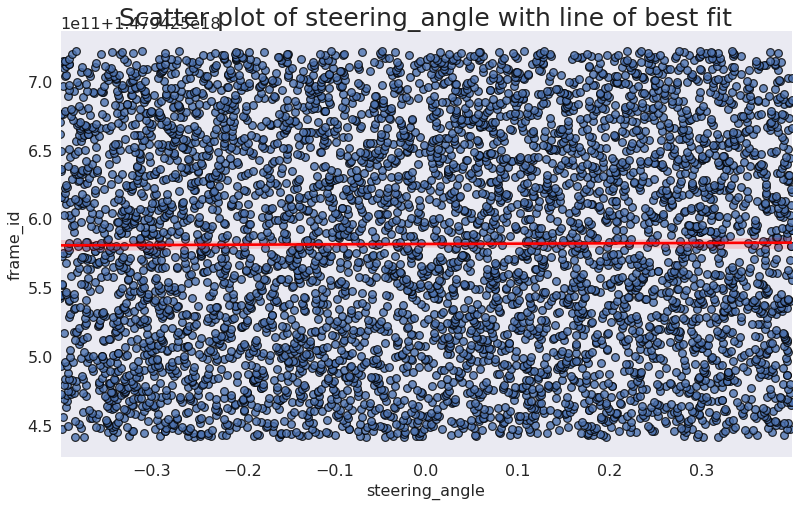

In [ ]:
# Plot
sns.set_style("dark")
gridobj = sns.lmplot(x="steering_angle", y="frame_id", data=df1, line_kws={'color': 'red'}, 
                     height=7, aspect=1.6, robust=True,  palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=1.2, edgecolors='black'))

# Decorations
plt.title("Scatter plot of steering_angle with line of best fit", fontsize=25)
plt.show()

So, Scatterplot with line of best fit suggests that there is no linear regression present in `steering_angle`.

#### 4) Density Curves with Histogram
Density curve with histogram brings together the collective information conveyed by the two plots so you can have them both in a single figure instead of two.

No handles with labels found to put in legend.


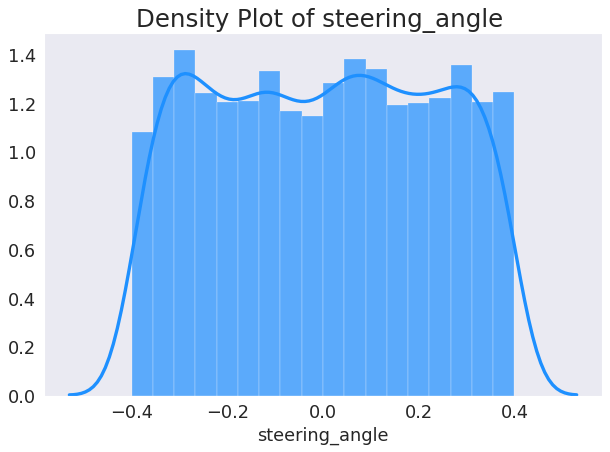

In [ ]:
# Draw Plot
plt.figure(figsize=(9,6), dpi= 80)
sns.distplot(df1.steering_angle, color="dodgerblue", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

# Decoration
plt.title('Density Plot of steering_angle ', fontsize=22)
plt.legend()
plt.show()

So, the density plot of `steering_angle` is almost constant but also little bit fluctuating.  

#### 5) Scatter and Density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28748827b8>,
      dtype=object)

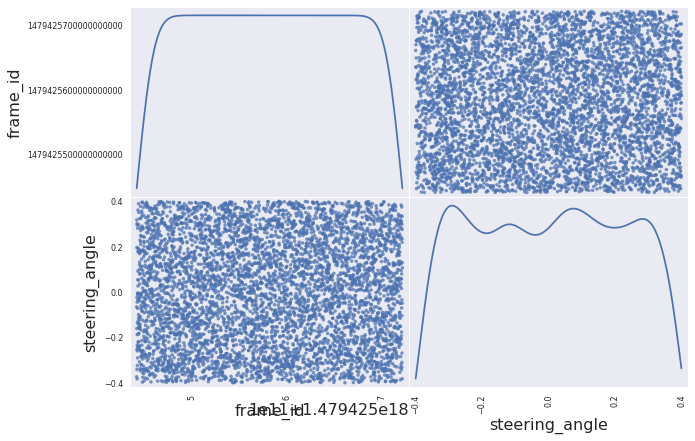

In [ ]:
pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[10, 7], diagonal='kde')

The Scatter plots of `steering_angle` & `frame_id` are not showing any essential information. Besides, the `frame_id`'s density plot is constant, however `steering_angle`'s density plot is little bit fluctuating.

## **Mean, Median, and Mode of `steering_angle`**

In [ ]:
from scipy import stats

mean = np. mean(df1.steering_angle)
print("Mean: {}".format(mean))
median = np. median(df1.steering_angle)
print("Median: {}".format(median))
mode = stats. mode(df1.steering_angle)
print("Mode: {}".format(mode))

Mean: 0.000487757865425786
Median: 0.00680191526189447
Mode: ModeResult(mode=array([-0.39974693]), count=array([1]))


`Mode` represents that `steering_angle` `-0.39974693` got repeated the most at that particular road location which means the exact angle of road at that moment would be approximately `negative 40%`.

## **Outliers**
Noise and exceptions in the data.

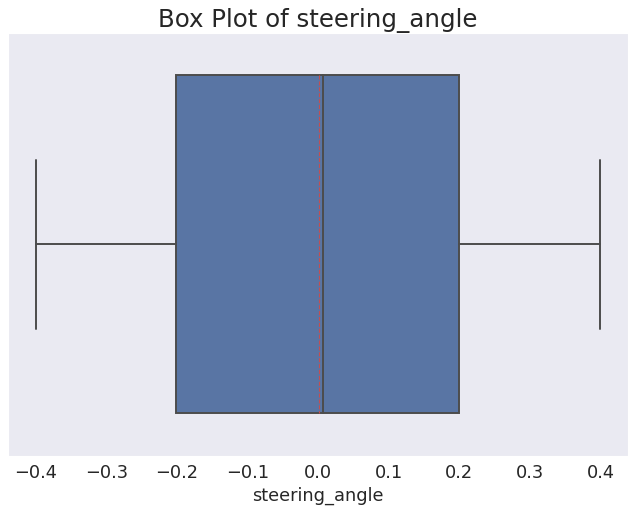

In [ ]:
# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
sns.boxplot(df1.steering_angle, data=df1,meanline=True, showmeans=True, orient='h')

# Decoration
plt.title('Box Plot of steering_angle', fontsize=22)
plt.show()

This Boxplot does not contain any outlier which means this data doesn't contain any unexpected value that can modify the resultant values. So, no need of data transformation.

# **Transfer Learning in Keras using InceptionV3**

In [ ]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
mobile = keras.applications.inception_v3.InceptionV3()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset= train.flow_from_directory('/content/drive/My Drive/Allripe/drone dataset 1/center/',
                                         target_size=(299, 299))

Found 0 images belonging to 0 classes.


**Result of predicting all images**

In [ ]:
from scipy import ndimage, misc
import numpy as np
import os
import cv2

path = "/content/drive/My Drive/Allripe/drone dataset 1/center/"

xyz=[]

# iterate through the names of contents of the folder
for image_path in os.listdir(path):
  # create the full input path and read the file
  input_path = os.path.join(path, image_path)
  img = image.load_img(input_path, color_mode='rgb', target_size=(299, 299))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  a=keras.applications.inception_v3.preprocess_input(img_array_expanded_dims)


  predictions = mobile.predict(a)
  results = imagenet_utils.decode_predictions(predictions)
  xyz.append(results)
xyz

[[[('n04487081', 'trolleybus', 0.2705429),
   ('n03345487', 'fire_engine', 0.12293137),
   ('n03417042', 'garbage_truck', 0.083838865),
   ('n03769881', 'minibus', 0.057373345),
   ('n04461696', 'tow_truck', 0.04302258)]],
 [[('n06874185', 'traffic_light', 0.67432916),
   ('n02930766', 'cab', 0.026321245),
   ('n03345487', 'fire_engine', 0.025776083),
   ('n04487081', 'trolleybus', 0.023182364),
   ('n03895866', 'passenger_car', 0.018069584)]],
 [[('n03345487', 'fire_engine', 0.24342561),
   ('n04467665', 'trailer_truck', 0.08232045),
   ('n02701002', 'ambulance', 0.034340005),
   ('n04461696', 'tow_truck', 0.034109395),
   ('n06874185', 'traffic_light', 0.030176409)]],
 [[('n06874185', 'traffic_light', 0.22001047),
   ('n02930766', 'cab', 0.086342864),
   ('n03345487', 'fire_engine', 0.065025054),
   ('n03895866', 'passenger_car', 0.052434012),
   ('n04335435', 'streetcar', 0.027200798)]],
 [[('n03891251', 'park_bench', 0.17314777),
   ('n09332890', 'lakeside', 0.053267334),
   ('n037

**Result of predicting first image**

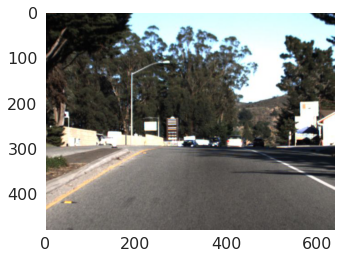

In [ ]:
img=image.load_img("/content/drive/My Drive/Allripe/drone dataset 1/center/1479425441182877835.jpg")
plt.imshow(img)

In [ ]:
xyz[0]

[[('n04487081', 'trolleybus', 0.2705429),
  ('n03345487', 'fire_engine', 0.12293137),
  ('n03417042', 'garbage_truck', 0.083838865),
  ('n03769881', 'minibus', 0.057373345),
  ('n04461696', 'tow_truck', 0.04302258)]]

Top-most prediction result

In [ ]:
xyz[0][0][0]

('n04487081', 'trolleybus', 0.2705429)

In [ ]:
print("Prediction class: {}".format(xyz[0][0][0][1]))

Prediction class: trolleybus


In [ ]:
print("Prediction accuracy: {}".format(xyz[0][0][0][2]))

Prediction accuracy: 0.2705428898334503


**Top-most Prediction Result of all images** 

In [ ]:
zzz=[]
for i in range(len(xyz)):
  for j in range(len(xyz[i])):
    for k in range(len(xyz[j])):
      zzz.append(xyz[i][j][0])

print(zzz)

[('n04487081', 'trolleybus', 0.2705429), ('n06874185', 'traffic_light', 0.67432916), ('n03345487', 'fire_engine', 0.24342561), ('n06874185', 'traffic_light', 0.22001047), ('n03891251', 'park_bench', 0.17314777), ('n03769881', 'minibus', 0.2630799), ('n04037443', 'racer', 0.5667651), ('n06874185', 'traffic_light', 0.5123368), ('n06874185', 'traffic_light', 0.06804107), ('n04037443', 'racer', 0.30720705), ('n04037443', 'racer', 0.2852858), ('n02701002', 'ambulance', 0.3400557), ('n04467665', 'trailer_truck', 0.16242835), ('n03345487', 'fire_engine', 0.38211906), ('n02701002', 'ambulance', 0.09398103), ('n03345487', 'fire_engine', 0.0933502), ('n03769881', 'minibus', 0.13220486), ('n04487081', 'trolleybus', 0.10867406), ('n03444034', 'go-kart', 0.1013572), ('n02701002', 'ambulance', 0.4862943), ('n02701002', 'ambulance', 0.24440667), ('n03345487', 'fire_engine', 0.14178228), ('n03895866', 'passenger_car', 0.23884937), ('n03417042', 'garbage_truck', 0.2126935), ('n02701002', 'ambulance', 0

`categories` will show all values 

In [ ]:
categories=[]

for i in range(len(zzz)):
  #for j in range(len(zzz[i])):
  categories.append(zzz[i][1])

print(categories)

['trolleybus', 'traffic_light', 'fire_engine', 'traffic_light', 'park_bench', 'minibus', 'racer', 'traffic_light', 'traffic_light', 'racer', 'racer', 'ambulance', 'trailer_truck', 'fire_engine', 'ambulance', 'fire_engine', 'minibus', 'trolleybus', 'go-kart', 'ambulance', 'ambulance', 'fire_engine', 'passenger_car', 'garbage_truck', 'ambulance', 'minibus', 'racer', 'minivan', 'trailer_truck', 'shopping_cart', 'minibus', 'racer', 'minivan', 'trolleybus', 'trolleybus', 'fire_engine', 'tow_truck', 'fire_engine', 'picket_fence', 'trailer_truck', 'minibus', 'fire_engine', 'golfcart', 'fire_engine', 'garbage_truck', 'racer', 'shopping_cart', 'minibus', 'trailer_truck', 'ambulance', 'go-kart', 'picket_fence', 'trailer_truck', 'fire_engine', 'tow_truck', 'passenger_car', 'trailer_truck', 'trolleybus', 'passenger_car', 'trolleybus', 'traffic_light', 'traffic_light', 'traffic_light', 'ambulance', 'traffic_light', 'racer', 'racer', 'trailer_truck', 'minibus', 'trailer_truck', 'fire_engine', 'ambul

`output` will show only unique values 

In [ ]:
output = np.unique(categories)
output

array(['American_black_bear', 'Model_T', 'Scotch_terrier',
       'aircraft_carrier', 'airliner', 'alp', 'ambulance', 'apiary',
       'barrow', 'beach_wagon', 'bicycle-built-for-two', 'birdhouse',
       'boathouse', 'breakwater', 'bubble', 'cab', 'canoe', 'car_mirror',
       'car_wheel', 'chainlink_fence', 'container_ship', 'crate',
       'crutch', 'dam', 'dock', 'fire_engine', 'flagpole', 'fountain',
       'freight_car', 'garbage_truck', 'go-kart', 'golfcart', 'gondola',
       'horse_cart', 'jeep', 'jinrikisha', 'lakeside', 'lawn_mower',
       'limousine', 'mailbox', 'minibus', 'minivan', 'mobile_home',
       'moving_van', 'obelisk', 'oxcart', 'park_bench', 'parking_meter',
       'passenger_car', 'patio', 'picket_fence', 'pickup', 'pier', 'pole',
       'police_van', 'racer', 'racket', 'radio_telescope', 'rain_barrel',
       'recreational_vehicle', 'red_fox', 'safety_pin', 'school_bus',
       'schooner', 'scoreboard', 'shopping_cart', 'snowplow',
       'sports_car', 'spotl

In [ ]:
len(output)

88

We have total 88 categories of images. 

Now, we will check count of every category of image

In [ ]:
unique, counts = np.unique(categories, return_counts=True)

aaa = np.asarray((unique, counts)).T
aaa

array([['American_black_bear', '1'],
       ['Model_T', '11'],
       ['Scotch_terrier', '1'],
       ['aircraft_carrier', '5'],
       ['airliner', '2'],
       ['alp', '92'],
       ['ambulance', '86'],
       ['apiary', '50'],
       ['barrow', '1'],
       ['beach_wagon', '1'],
       ['bicycle-built-for-two', '3'],
       ['birdhouse', '1'],
       ['boathouse', '7'],
       ['breakwater', '42'],
       ['bubble', '2'],
       ['cab', '47'],
       ['canoe', '3'],
       ['car_mirror', '94'],
       ['car_wheel', '3'],
       ['chainlink_fence', '19'],
       ['container_ship', '13'],
       ['crate', '1'],
       ['crutch', '3'],
       ['dam', '3'],
       ['dock', '6'],
       ['fire_engine', '380'],
       ['flagpole', '4'],
       ['fountain', '21'],
       ['freight_car', '6'],
       ['garbage_truck', '350'],
       ['go-kart', '15'],
       ['golfcart', '173'],
       ['gondola', '1'],
       ['horse_cart', '9'],
       ['jeep', '33'],
       ['jinrikisha', '1'],
       ['

In [ ]:
unique

array(['American_black_bear', 'Model_T', 'Scotch_terrier',
       'aircraft_carrier', 'airliner', 'alp', 'ambulance', 'apiary',
       'barrow', 'beach_wagon', 'bicycle-built-for-two', 'birdhouse',
       'boathouse', 'breakwater', 'bubble', 'cab', 'canoe', 'car_mirror',
       'car_wheel', 'chainlink_fence', 'container_ship', 'crate',
       'crutch', 'dam', 'dock', 'fire_engine', 'flagpole', 'fountain',
       'freight_car', 'garbage_truck', 'go-kart', 'golfcart', 'gondola',
       'horse_cart', 'jeep', 'jinrikisha', 'lakeside', 'lawn_mower',
       'limousine', 'mailbox', 'minibus', 'minivan', 'mobile_home',
       'moving_van', 'obelisk', 'oxcart', 'park_bench', 'parking_meter',
       'passenger_car', 'patio', 'picket_fence', 'pickup', 'pier', 'pole',
       'police_van', 'racer', 'racket', 'radio_telescope', 'rain_barrel',
       'recreational_vehicle', 'red_fox', 'safety_pin', 'school_bus',
       'schooner', 'scoreboard', 'shopping_cart', 'snowplow',
       'sports_car', 'spotl

In [ ]:
counts

array([  1,  11,   1,   5,   2,  92,  86,  50,   1,   1,   3,   1,   7,
        42,   2,  47,   3,  94,   3,  19,  13,   1,   3,   3,   6, 380,
         4,  21,   6, 350,  15, 173,   1,   9,  33,   1,  71,   3,  27,
        19, 406,  79, 216,  18,  28,   1,  34,   1,  24,  11,  25,  12,
         4,  79,  33, 605,   2,   3,   3, 181,   1,   2,   5,  15,   7,
         3,   5,  17,   3,  17,  36,   1,  17,   1, 184,   1, 655, 978,
         3, 146,   3,  79,  40,   2,   7,   8,   1,   2])

presenting actual number of images of each class in train dataset

In [ ]:
df = pd.DataFrame({"Image class":unique,
                  "Count":counts})
df.head()

,Image class,Count
0,American_black_bear,1
1,Model_T,11
2,Scotch_terrier,1
3,aircraft_carrier,5
4,airliner,2


In [ ]:
df_sorted_desc= df.sort_values('Count',ascending=False)
df_sorted_desc.head()

,Image class,Count
77,trailer_truck,978
76,traffic_light,655
55,racer,605
40,minibus,406
25,fire_engine,380


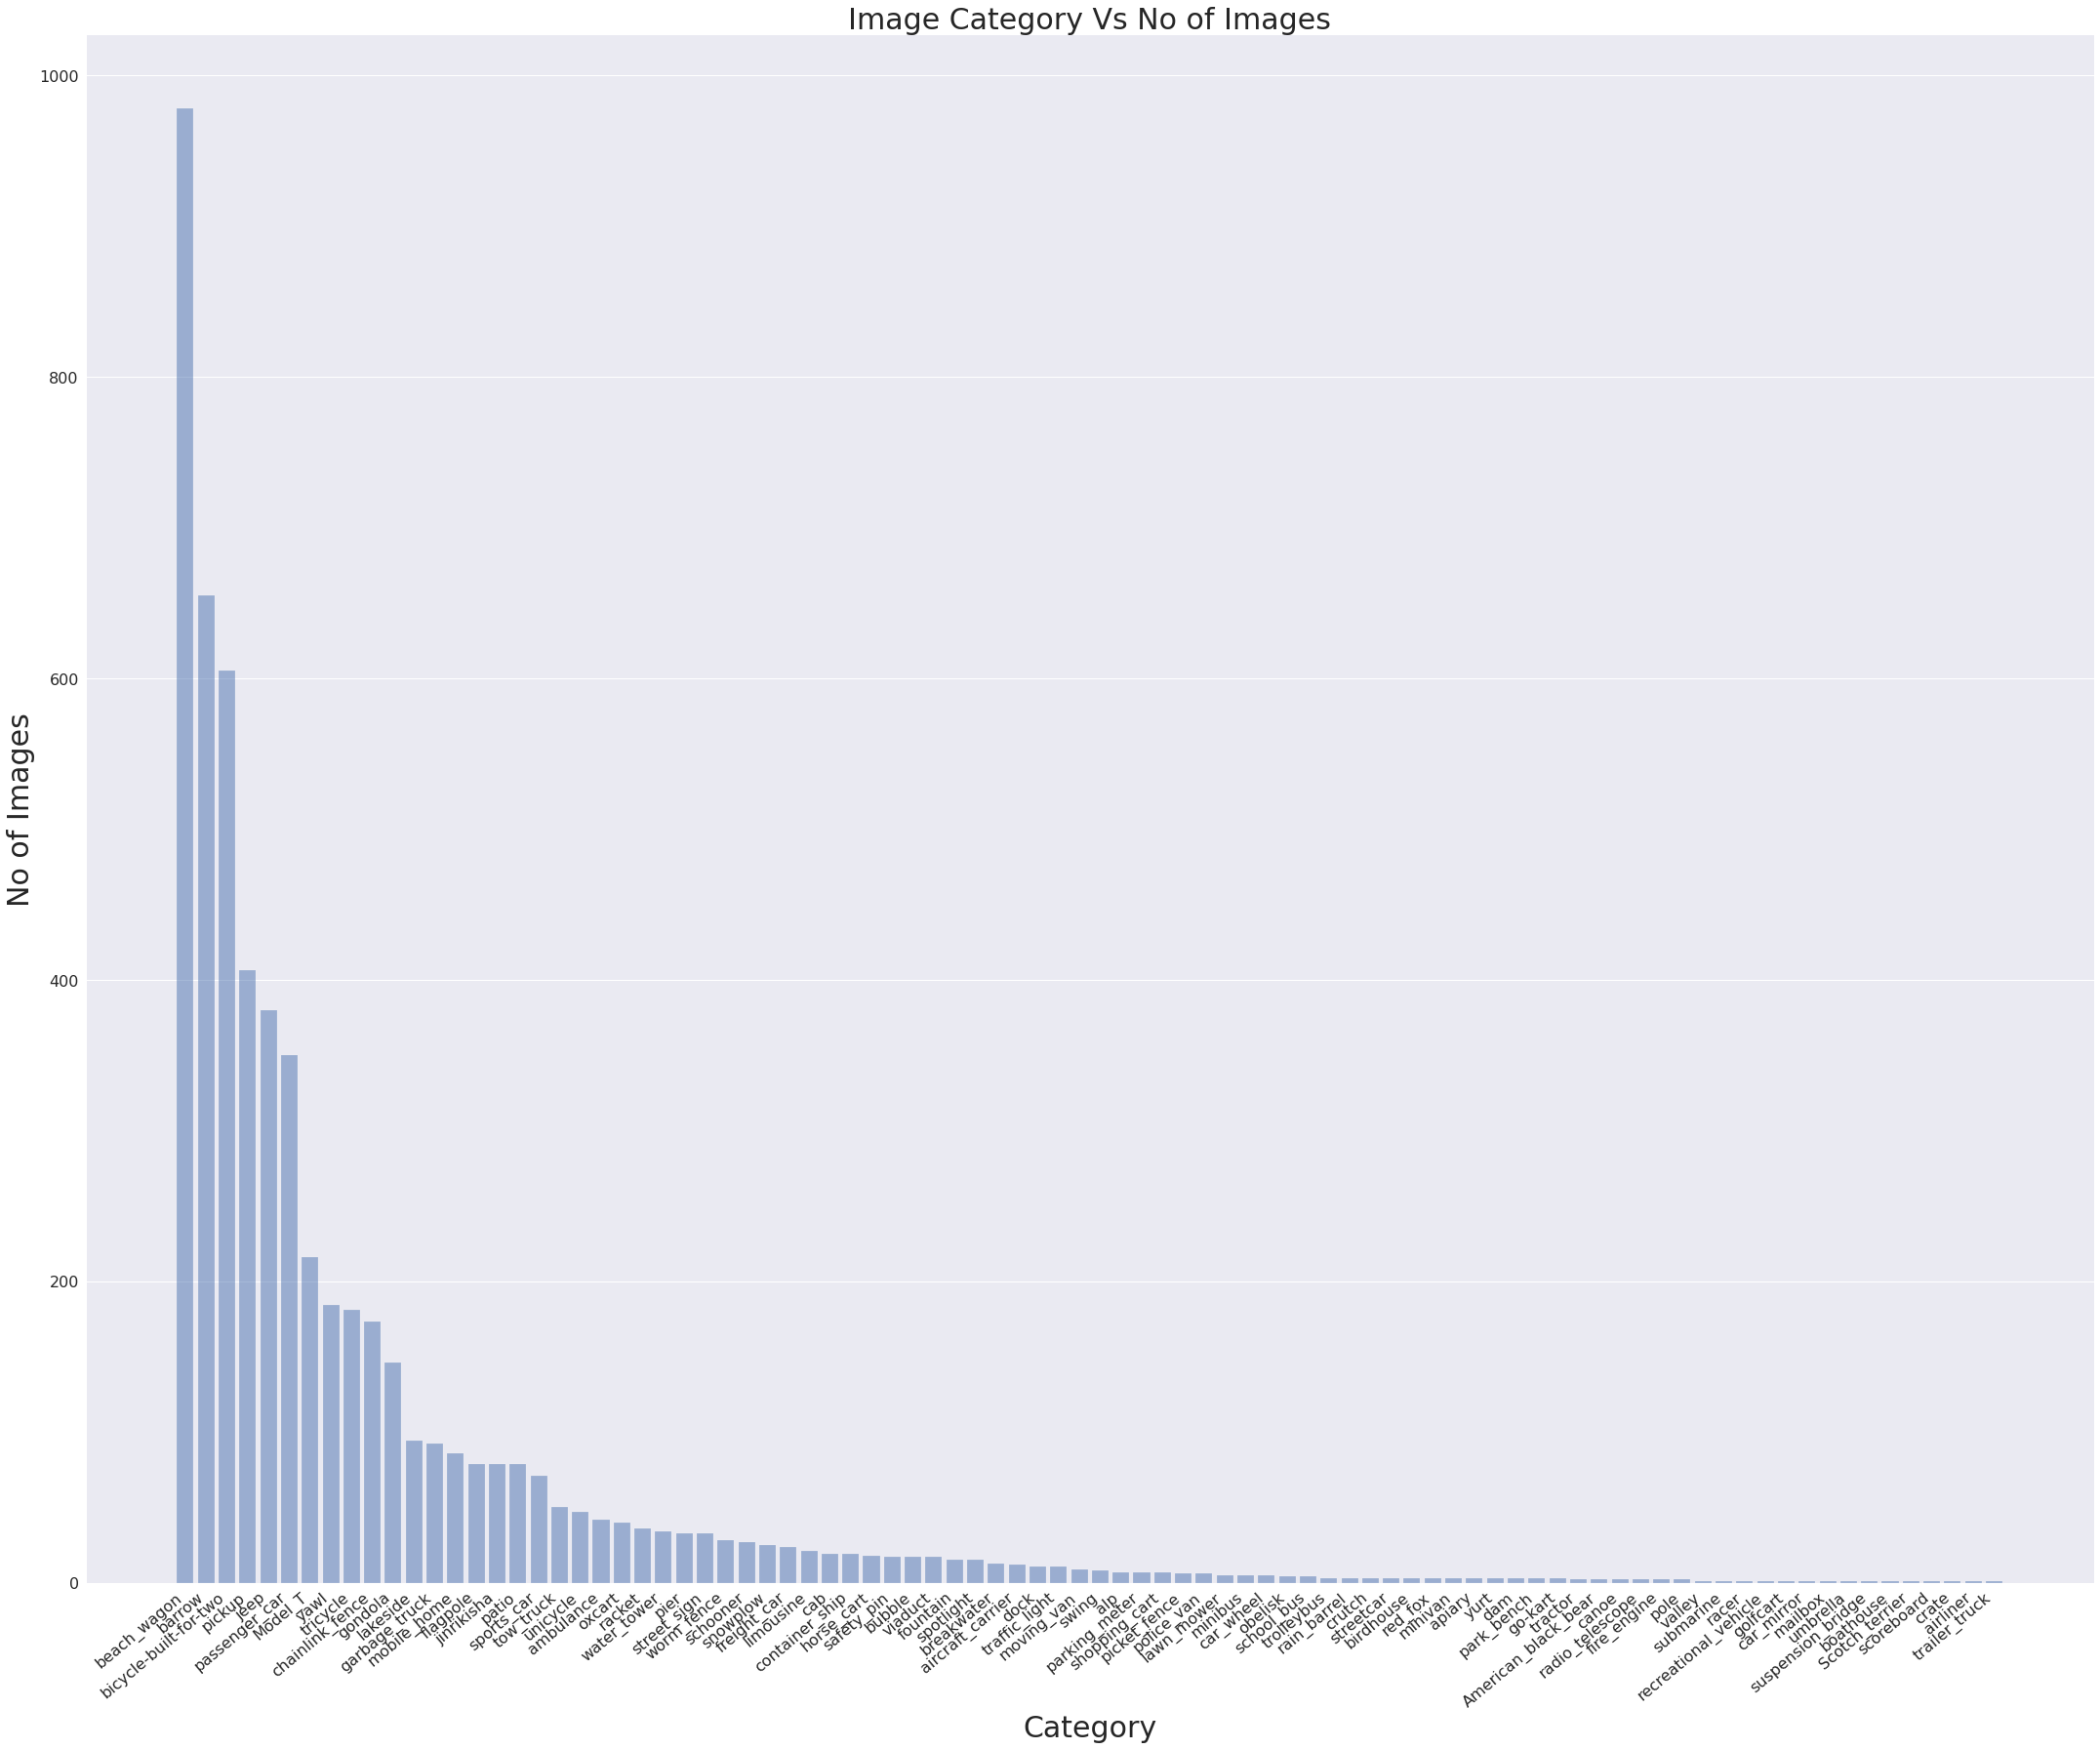

In [ ]:
# Build the plot
fig, ax = plt.subplots(figsize=(30, 25))

ax.bar(df_sorted_desc['Image class'],df_sorted_desc['Count'], align='center', alpha=0.5)
ax.set_xlabel('Category',fontsize=30)
ax.set_ylabel('No of Images',fontsize=30)
ax.set_xticks(unique)
ax.set_xticklabels(df_sorted_desc['Image class'], rotation=40, ha="right")
ax.set_title('Image Category Vs No of Images',fontsize=30)
ax.yaxis.grid(True)



# Save the figure and show
plt.tight_layout()
plt.show()

In [ ]:
df_new=df_sorted_desc.loc[df_sorted_desc['Count']>90]
df_new.head()

,Image class,Count
77,trailer_truck,978
76,traffic_light,655
55,racer,605
40,minibus,406
25,fire_engine,380


In [ ]:
len(df_new)

13

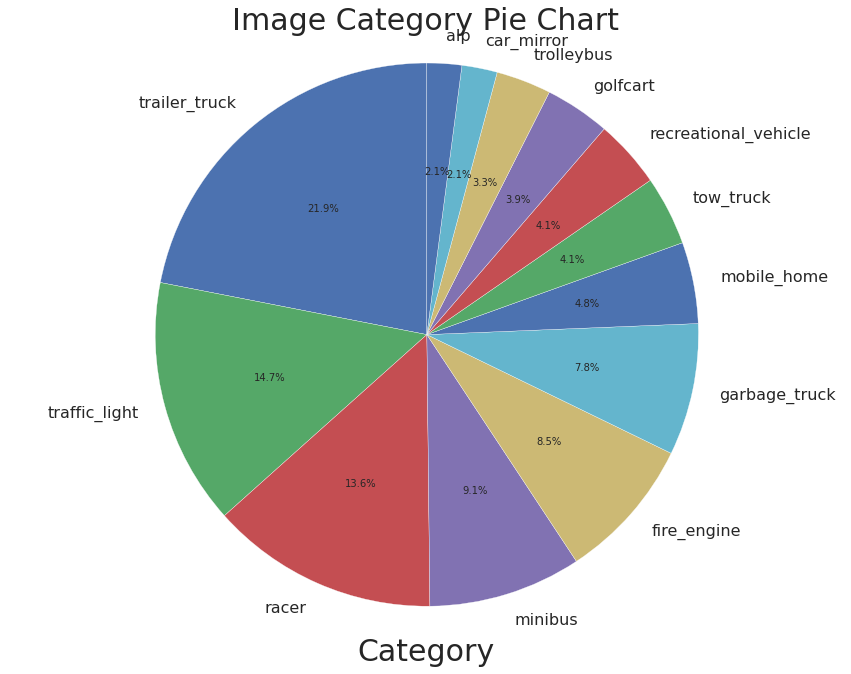

In [ ]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
#explode = (0.12, 0.12, 0.1, 0.075,0.07, 0.05, 0.02, 0.02,0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.2, 0.1, 0.1, 0.1,0.1, 0.1, 0.2,0.1)

fig, ax = plt.subplots(figsize=(15, 11))
ax.pie(df_new['Count'],
       #explode=explode,
       labels=df_new['Image class'],
       autopct='%1.1f%%',
       startangle=90)
ax.set_xlabel('Category',fontsize=30)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Image Category Pie Chart',fontsize=30)


plt.show()

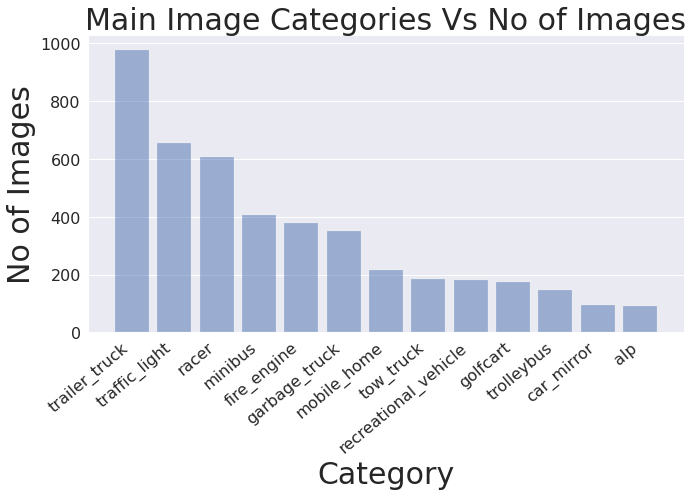

In [ ]:
# Build the plot
fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(df_new['Image class'],df_new['Count'], align='center', alpha=0.5)
ax.set_xlabel('Category',fontsize=30)
ax.set_ylabel('No of Images',fontsize=30)
#ax.set_xticks(unique)
ax.set_xticklabels(df_new['Image class'], rotation=40, ha="right")
ax.set_title('Main Image Categories Vs No of Images',fontsize=30)
ax.yaxis.grid(True)



# Save the figure and show
plt.tight_layout()
plt.show()

## **Conclusion**

**Therefore, the top 6 predictions are  `trailer_truck`, `traffic_light`, `racer`, `minibus`, `fire_engine`, & `garbage_truck`.**